In [1]:
# Importation de librairie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Chargement des données

data = pd.read_excel('data_coeur.xlsx')
df = data.copy()

In [3]:
# Renommer

df = df.rename(columns={"TDT": "Doul_Thorax", "DEPRESSION ": "Depression", "PAR":"P_Arterielle", "GAJ":"Glycemie_AJ",
                   "FCMAX":"Freq_CardMax"})

In [4]:
df

,AGE,SEXE,Doul_Thorax,P_Arterielle,CHOLESTEROL,Glycemie_AJ,ECG,Freq_CardMax,ANGINE,Depression,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           918 non-null    int64  
 1   SEXE          918 non-null    object 
 2   Doul_Thorax   918 non-null    object 
 3   P_Arterielle  918 non-null    int64  
 4   CHOLESTEROL   918 non-null    int64  
 5   Glycemie_AJ   918 non-null    int64  
 6   ECG           918 non-null    object 
 7   Freq_CardMax  918 non-null    int64  
 8   ANGINE        918 non-null    object 
 9   Depression    918 non-null    float64
 10  PENTE         918 non-null    object 
 11  CŒUR          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df[['AGE', 'P_Arterielle', 'CHOLESTEROL', 'Freq_CardMax', 'Depression']].describe().round(1)

,AGE,P_Arterielle,CHOLESTEROL,Freq_CardMax,Depression
count,918.0,918.0,918.0,918.0,918.0
mean,53.5,132.4,198.8,136.8,0.9
std,9.4,18.5,109.4,25.5,1.1
min,28.0,0.0,0.0,60.0,-2.6
25%,47.0,120.0,173.2,120.0,0.0
50%,54.0,130.0,223.0,138.0,0.6
75%,60.0,140.0,267.0,156.0,1.5
max,77.0,200.0,603.0,202.0,6.2


In [7]:
df.describe(include='object')

,SEXE,Doul_Thorax,ECG,ANGINE,PENTE
count,918,918,918,918,918
unique,2,4,3,2,3
top,homme,ASY,Normal,Non,Plat
freq,725,496,552,547,460


In [8]:
# Vérification des valeurs manquantes, ou duplication de certaines données

In [9]:
df.isna().sum()

AGE             0
SEXE            0
Doul_Thorax     0
P_Arterielle    0
CHOLESTEROL     0
Glycemie_AJ     0
ECG             0
Freq_CardMax    0
ANGINE          0
Depression      0
PENTE           0
CŒUR            0
dtype: int64

In [10]:
df.duplicated().unique()

array([False])

### Visualisation

on va voir un peu les distributions de chaque variable. d'abord les quanti puis les quali.

In [11]:
# Variable Quantitative
quanti_df = df[['AGE', 'P_Arterielle', 'CHOLESTEROL', 'Freq_CardMax', 'Depression']]

<Figure size 432x288 with 0 Axes>

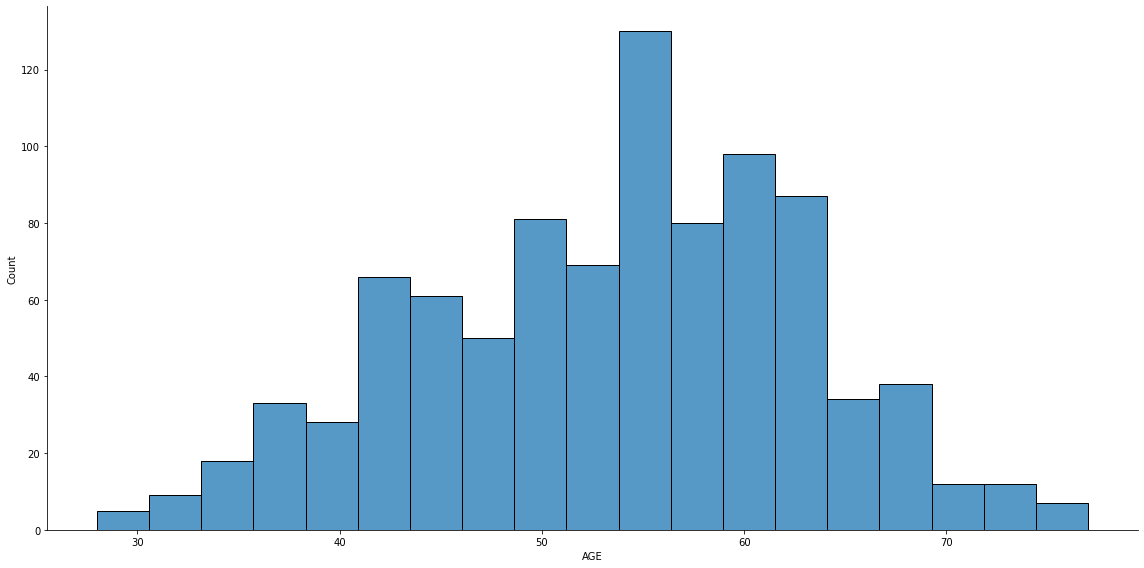

<Figure size 432x288 with 0 Axes>

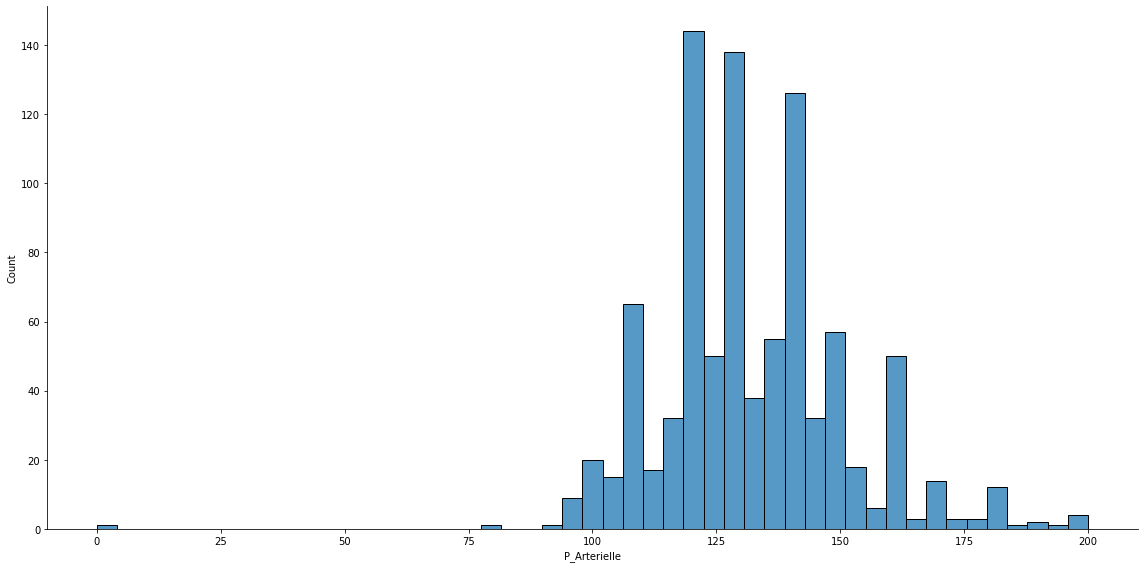

<Figure size 432x288 with 0 Axes>

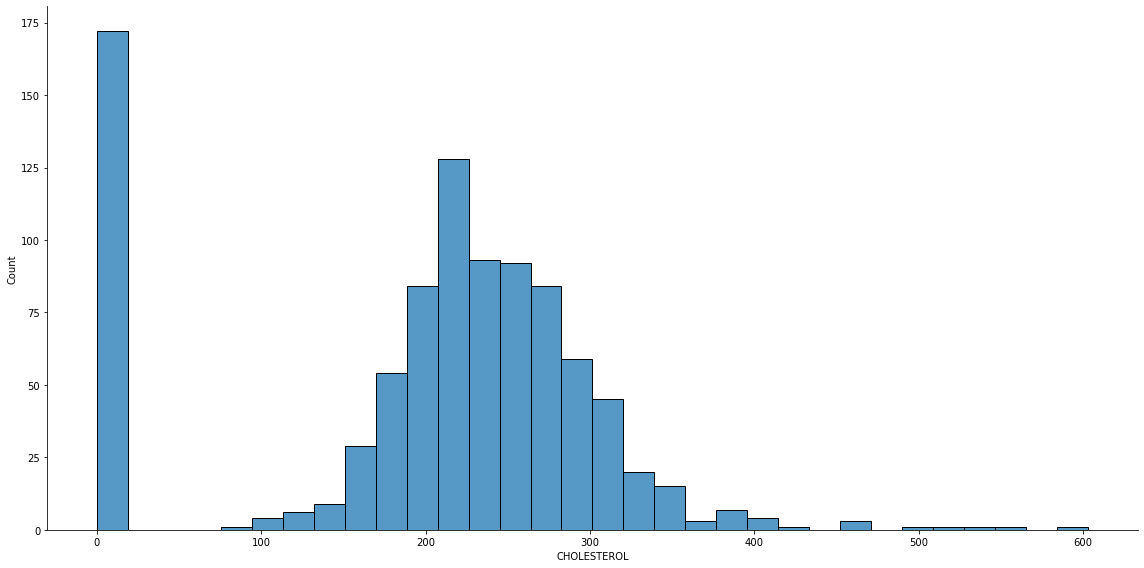

<Figure size 432x288 with 0 Axes>

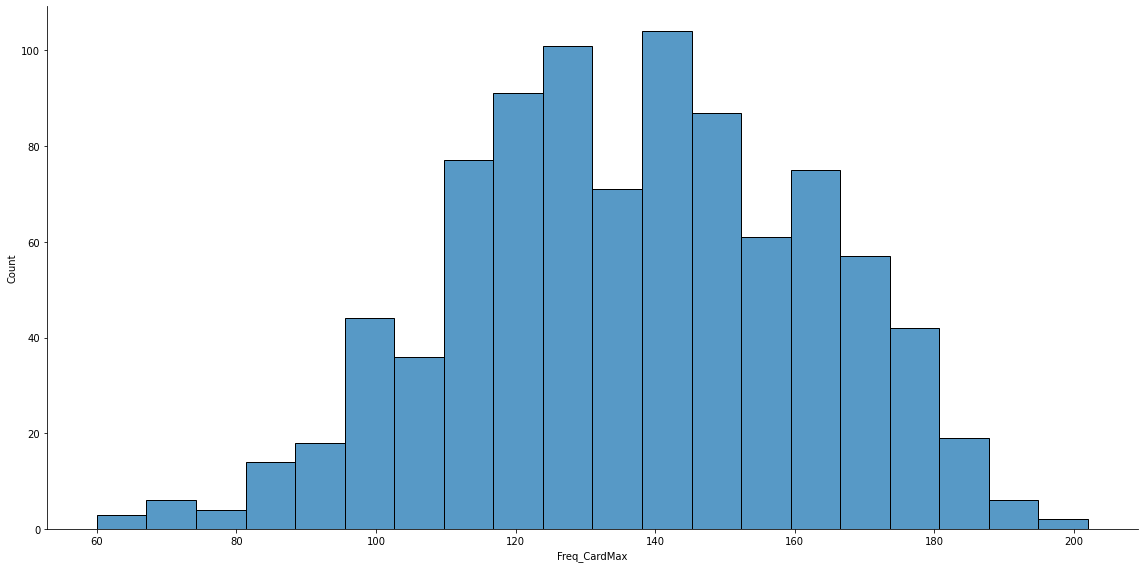

<Figure size 432x288 with 0 Axes>

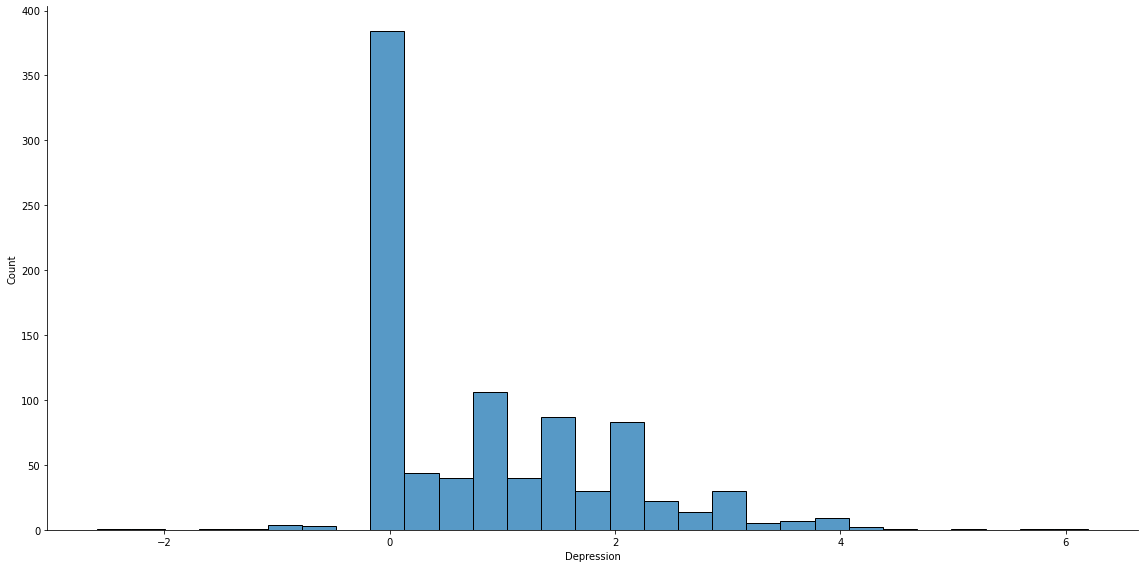

In [36]:
for col in quanti_df:
    plt.figure()
    sns.displot(df[col],height=8, aspect=2)
plt.show()

#### Observation de la repartition des individus de notre dataset.

##### Age :
Notre dataset est constitué majoritairement d'individu dont l'âge est compris entre 40 et 65 ans.
##### Presssion artérielle :
un individu a '0' ce qui est un peu bizarre, car un être vivant ne saurait avoir une PAR de zéro. Pour le reste des individus, nous observons une concentration d'individu dont la PAR est compris entre 110 et 160.
##### Cholestérol :
Un grand nombre d'individus ont pour taux '0' (le pic même) ce qui suscite des intérrogations car ce phénomène est quasi inexistant après une recherche auprès de médecin. ?????
Pour le reste des individus nous avons un taux compris entre 150 et 310.
##### Fréquence cardiaque
Nous avons une repartition importante des individus entre 150 et 310.
##### Dépression 
Les non-dépressifs (valeur de 0) dominent l'effectif et de loin.

###### Conclusion 
La repartition des individus est pas mal distribuée elle pourrait nous offrir des resultats probant pour notre étude mais cela ne suffit pas. IL faut voir les var qualitatives ensuite les croiser pour voir l'influence entre-elle, et aussi voir laquelle ou lesquelles d'entre-elle qui explique au mieux notre variable cible qui est # Coeur.
Une précision sera portée du côté de la variable "Cholestérol" car on pourrait penser que le taux nul correspond à des valeurs manquante...

In [13]:
df['CHOLESTEROL'].value_counts()
# 172 individus avec un taux nul bizarre ???

0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: CHOLESTEROL, Length: 222, dtype: int64

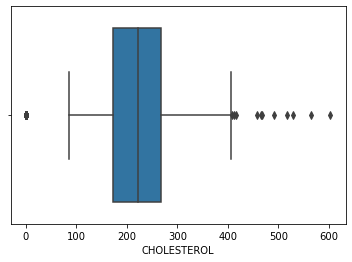

In [14]:
sns.boxplot(x = "CHOLESTEROL", data = df)
plt.show()

# Nous pouvons constater que il y a bien de valeurs abérante et certaine extrême

In [15]:
# Variable qualitative

kali_df = df[['SEXE', 'Doul_Thorax', 'Glycemie_AJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR']]

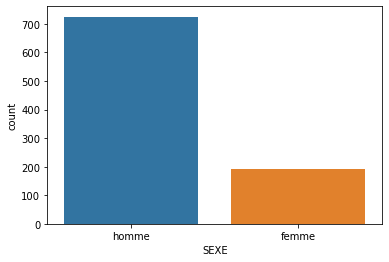

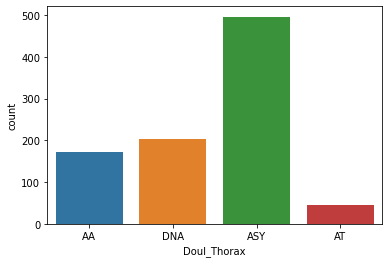

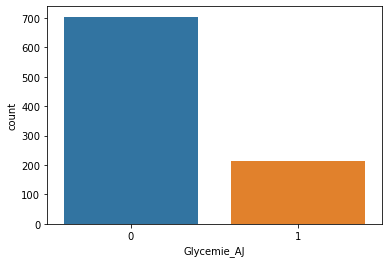

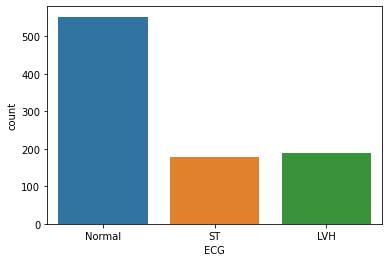

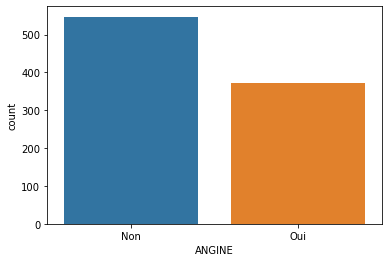

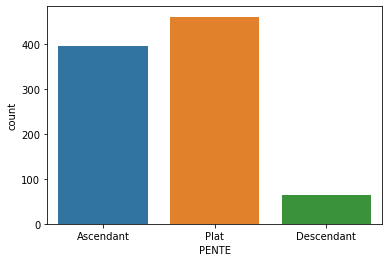

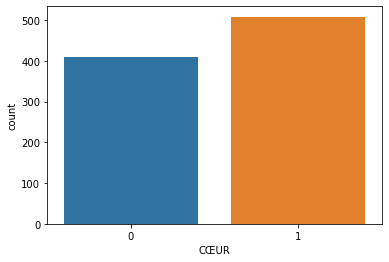

In [16]:
for col in kali_df:
    plt.figure()
    sns.countplot(x = col, data=df)
plt.show()

#### Observation de la repartition des individus de notre dataset (Variable qualitative)

##### SEXE :
Nous avons une repartition inégale entre les hommes en majorité et les femmes en minorité. Les hommes constitues les 2/3 de notre jeu de données.

##### Douleur thoracique
Les individus asymptomatique (sans signe clinique apparent) dominent l'effectif, ensuite deux autres modalités DNA et AA qui ont presque les mêmes effectifs, enfin les AT qui represente la modalité la plus faible de toute.

##### Glycémie à jeun 
les plus représentés (plus du 2/3) dans ce jeu de données sont les individus présentante un taux normal de glmycémie. On verra leur implication dans le MCV.

##### ECG
l'électrcardiogramme pris sur le jeu de données est dominé par des individus Normaux qui représente plus de la moitié des individus.

##### Angine
Les non-angineux sont les plus représentés ici aussi les individus sains sont les plus représenté.

##### Pente
les tendances plate et ascendante sont mésurées sur presque tout les individus à l'instar de la tendance descendante qui est un peu à la traine.

##### Conclusion 
Lorsque nous regardons dans l'ensemble, nous remarquons que les individus présent dans notre dataset de par les variables qualitatives sont pour la plus part sain. Cependant les malades du coeur sont plus nombreux que les non-malades. D'autre analyses plus poussées nous siturons sur les causes.

In [17]:
# voir l'action des variables quanti deux à deux


<Figure size 432x288 with 0 Axes>

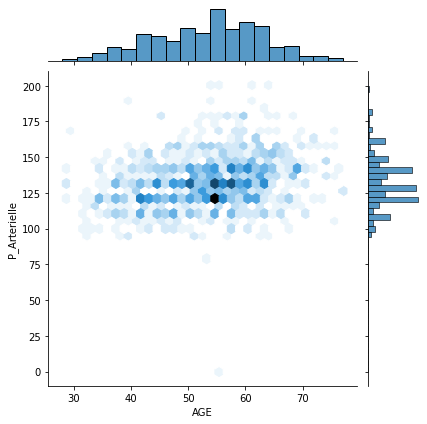

<Figure size 432x288 with 0 Axes>

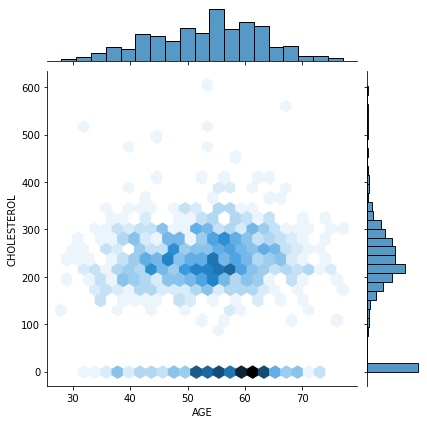

<Figure size 432x288 with 0 Axes>

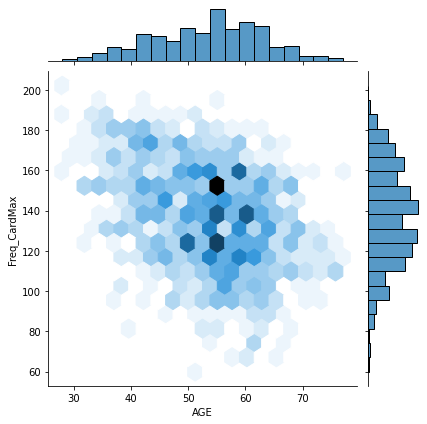

<Figure size 432x288 with 0 Axes>

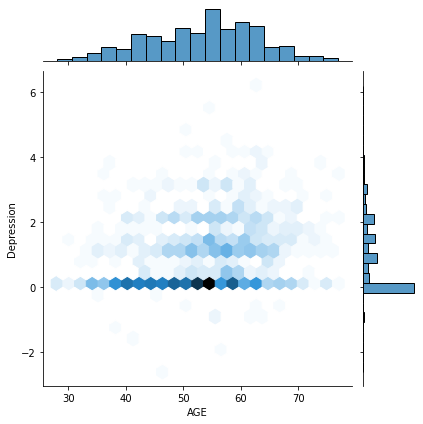

<Figure size 432x288 with 0 Axes>

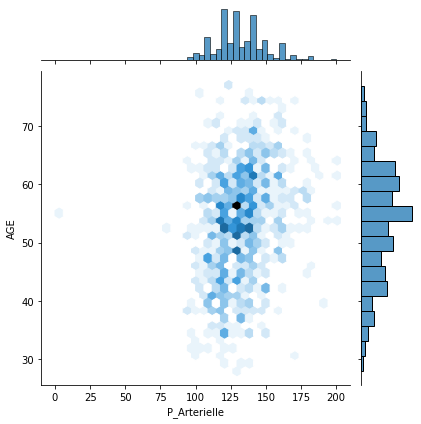

<Figure size 432x288 with 0 Axes>

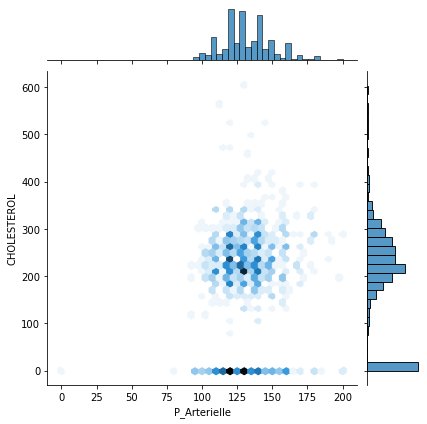

<Figure size 432x288 with 0 Axes>

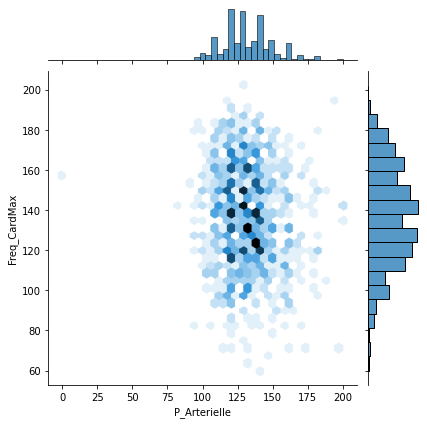

<Figure size 432x288 with 0 Axes>

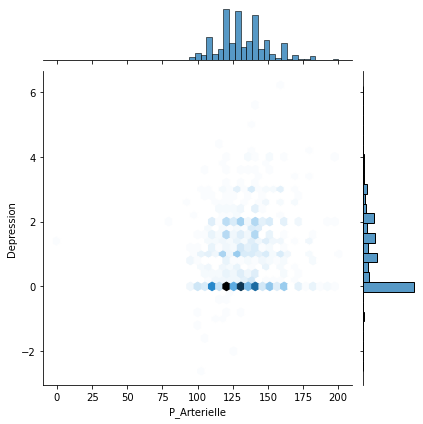

<Figure size 432x288 with 0 Axes>

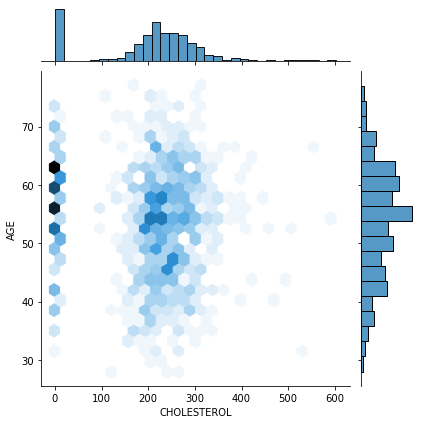

<Figure size 432x288 with 0 Axes>

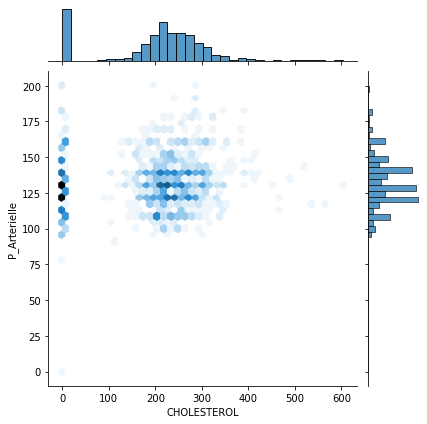

<Figure size 432x288 with 0 Axes>

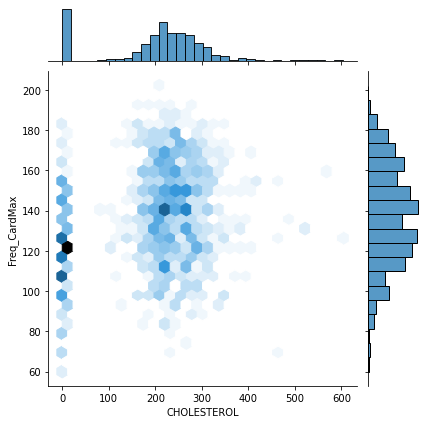

<Figure size 432x288 with 0 Axes>

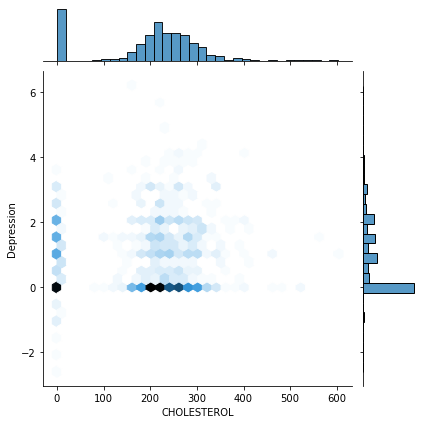

<Figure size 432x288 with 0 Axes>

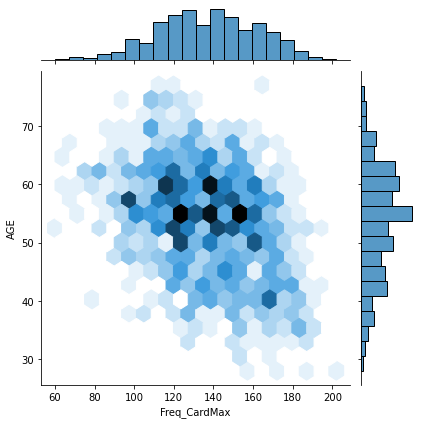

<Figure size 432x288 with 0 Axes>

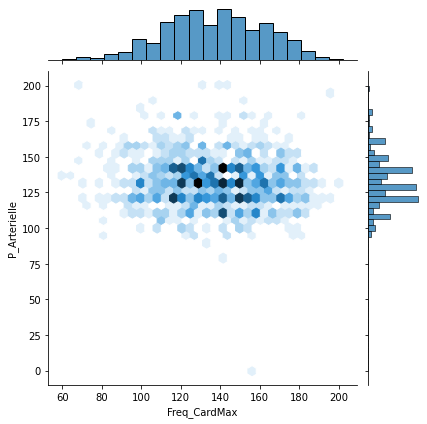

<Figure size 432x288 with 0 Axes>

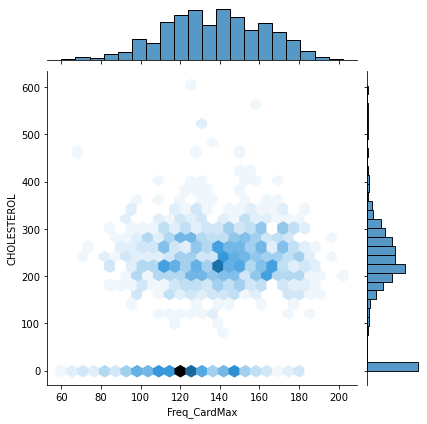

<Figure size 432x288 with 0 Axes>

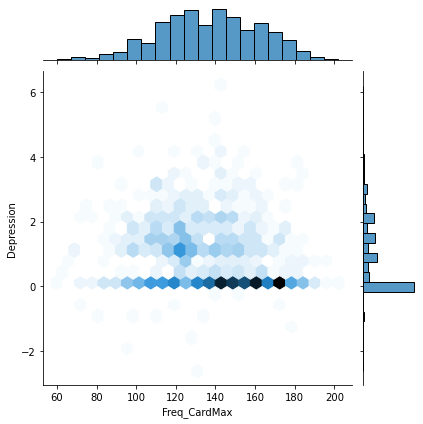

<Figure size 432x288 with 0 Axes>

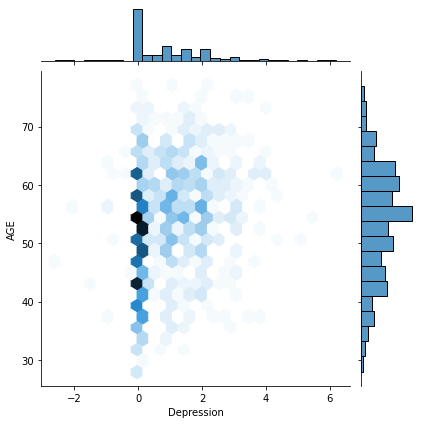

<Figure size 432x288 with 0 Axes>

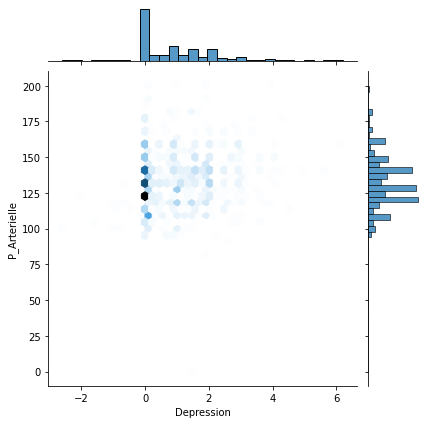

<Figure size 432x288 with 0 Axes>

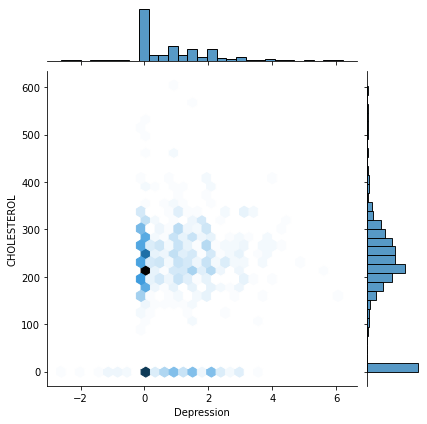

<Figure size 432x288 with 0 Axes>

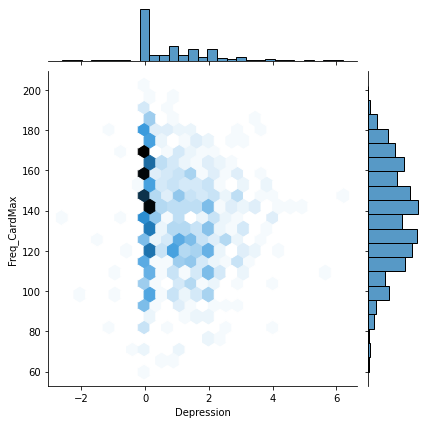

In [18]:
for col in quanti_df:
    for row in quanti_df:
        if col != row:            
            plt.figure()
            sns.jointplot(x = col, y = row, data = df, kind = "hex")
plt.show()

In [19]:
# variable quanti avec la variable cible coeur 

<Figure size 432x288 with 0 Axes>

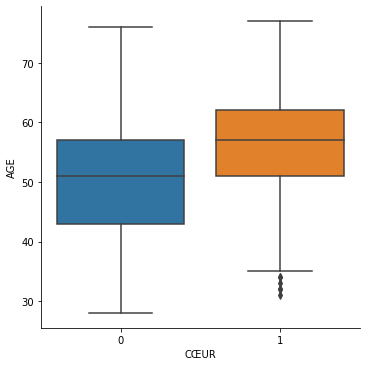

<Figure size 432x288 with 0 Axes>

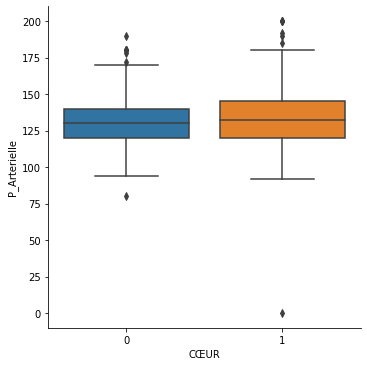

<Figure size 432x288 with 0 Axes>

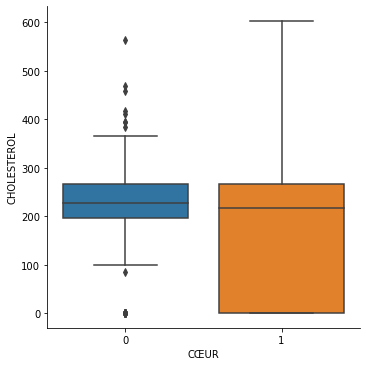

<Figure size 432x288 with 0 Axes>

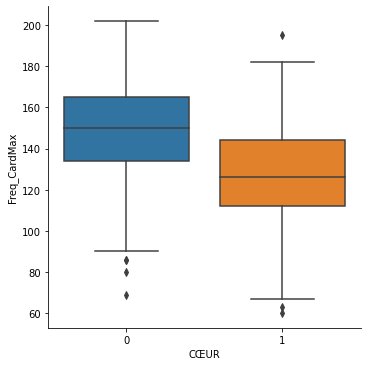

<Figure size 432x288 with 0 Axes>

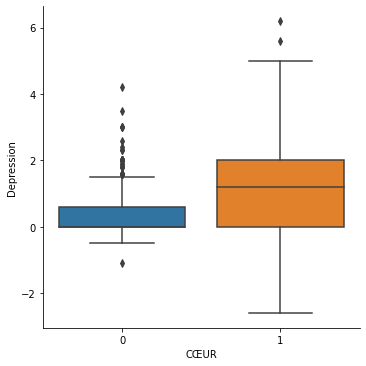

In [20]:
for col in quanti_df:
    plt.figure()
    sns.factorplot(x = "CŒUR", y = col, data = df, kind = "box")
plt.show()

In [21]:
# p = sns.FacetGrid(df, row = "SEXE")
# p.map(sns.distplot, "CŒUR")

In [22]:
# Variable qualitative deux à deux

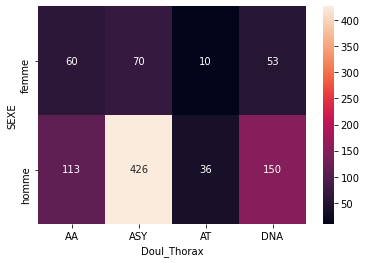

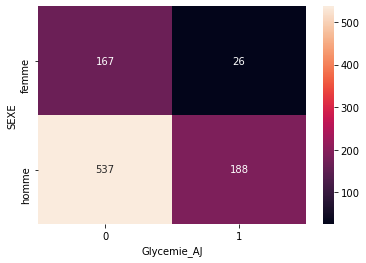

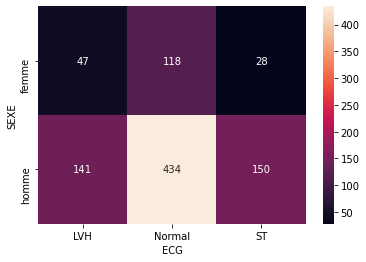

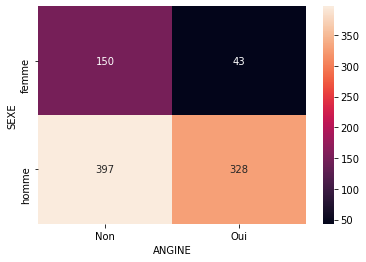

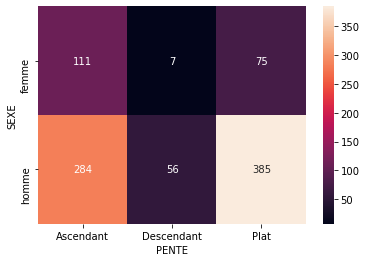

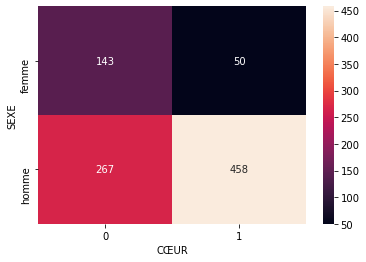

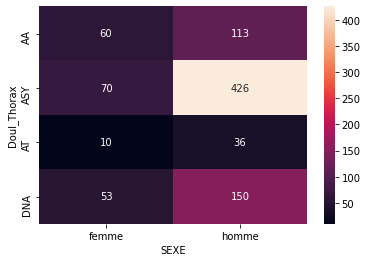

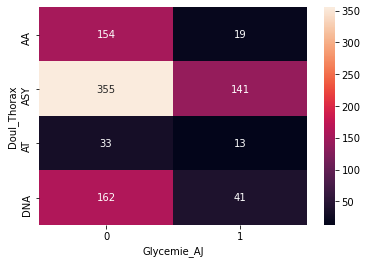

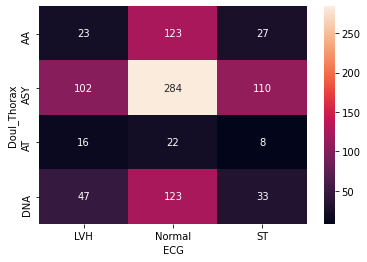

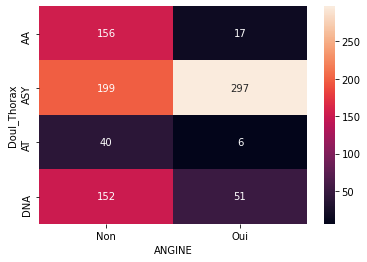

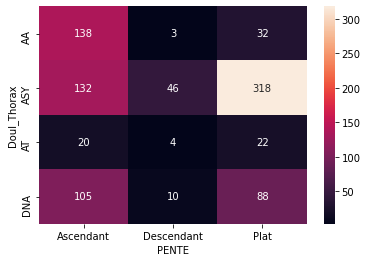

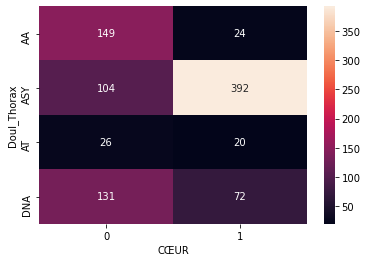

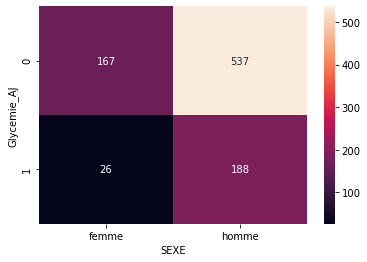

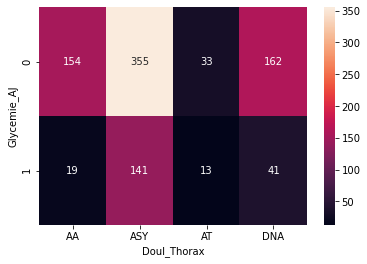

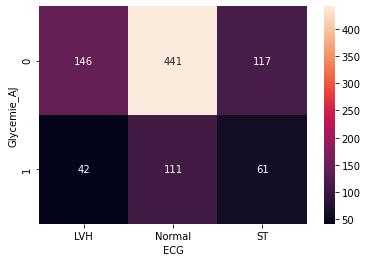

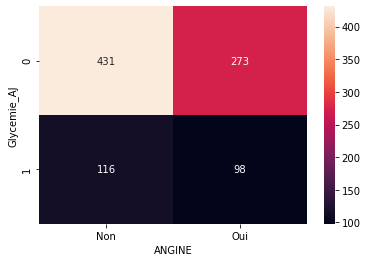

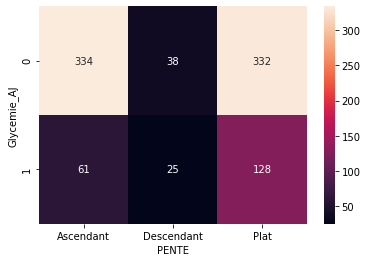

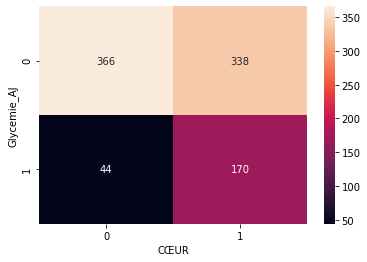

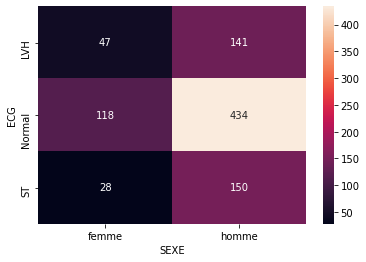

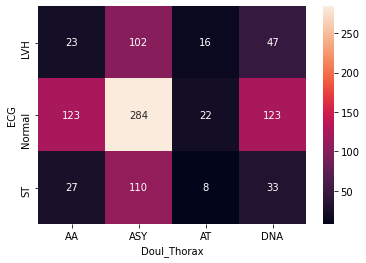

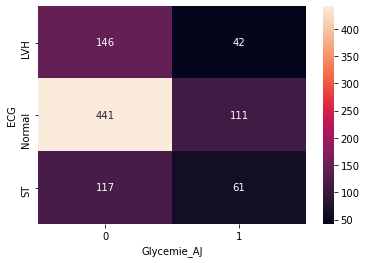

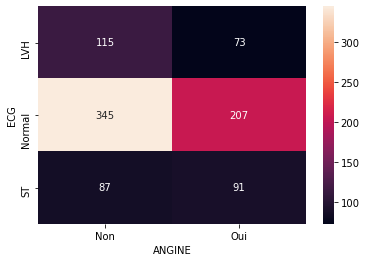

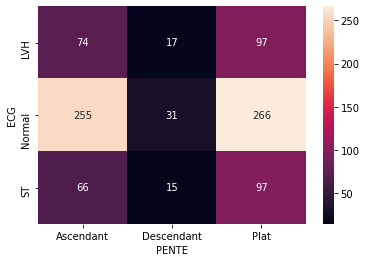

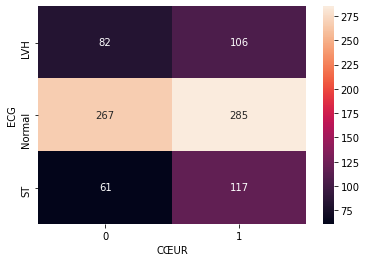

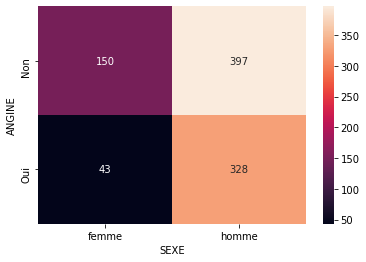

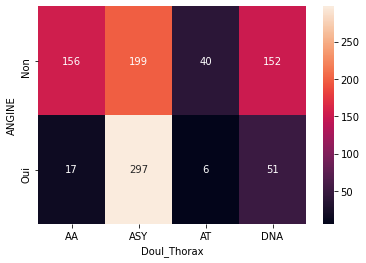

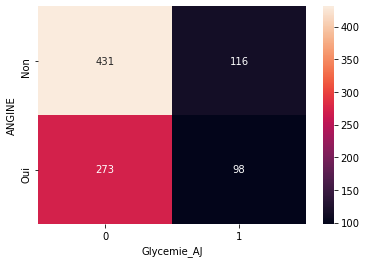

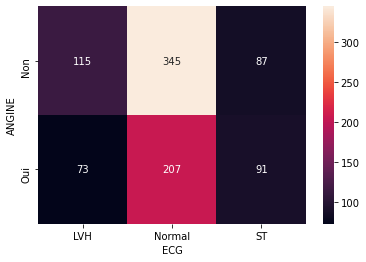

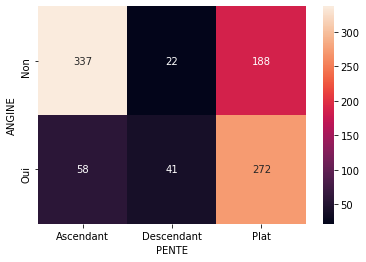

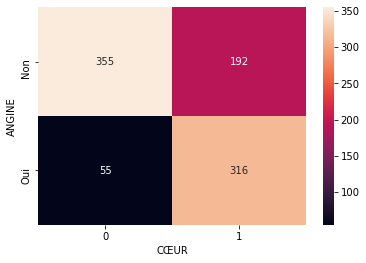

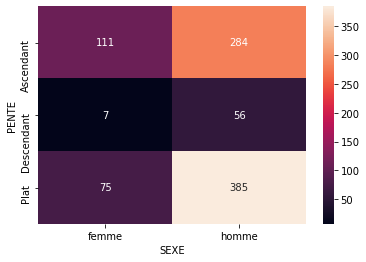

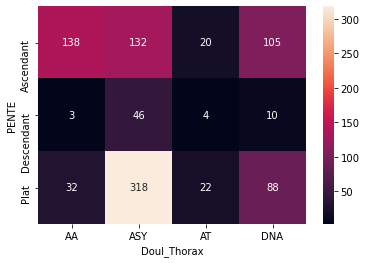

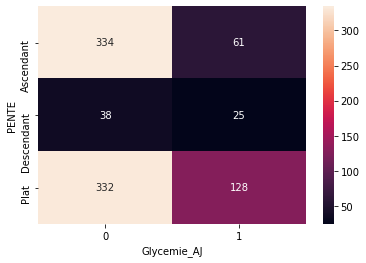

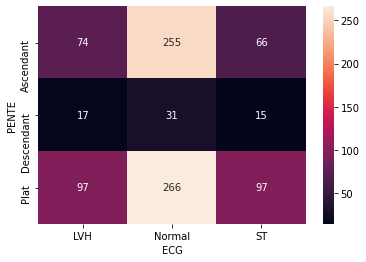

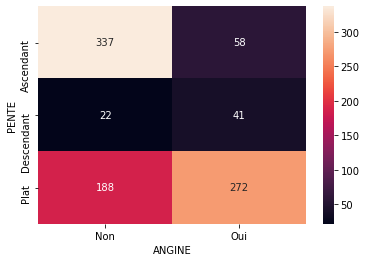

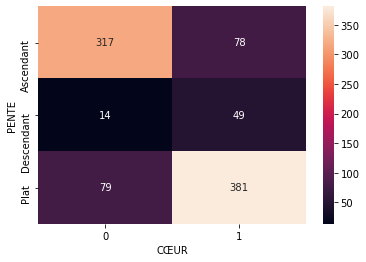

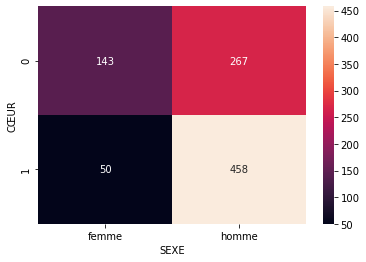

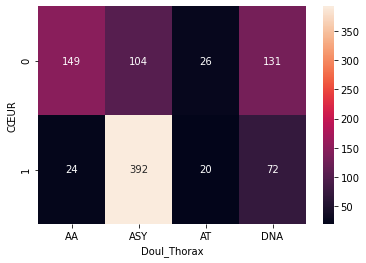

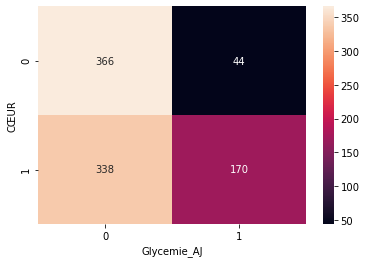

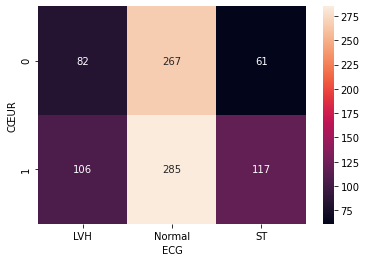

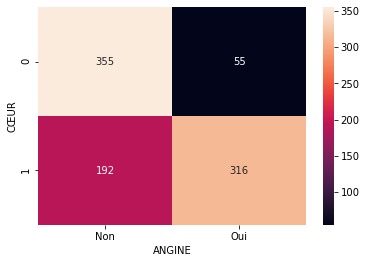

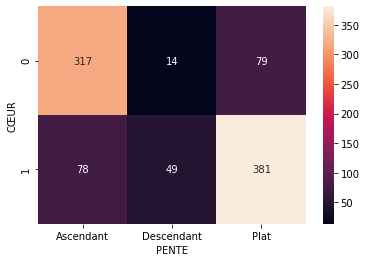

In [23]:
for col in kali_df:
    for row in kali_df:
        if col != row:            
            plt.figure()
            sns.heatmap(pd.crosstab(df[col], df[row]), annot=True,fmt='d')
plt.show()

<Figure size 432x288 with 0 Axes>

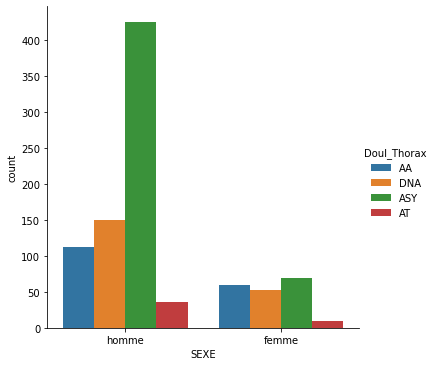

<Figure size 432x288 with 0 Axes>

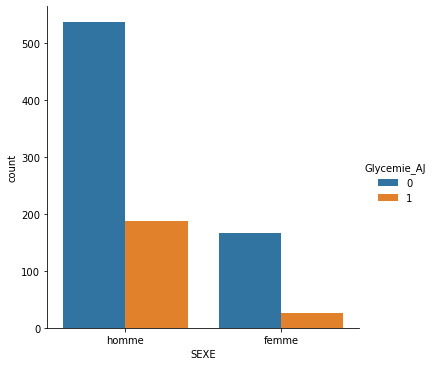

<Figure size 432x288 with 0 Axes>

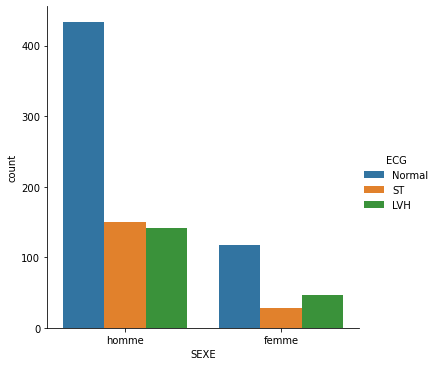

<Figure size 432x288 with 0 Axes>

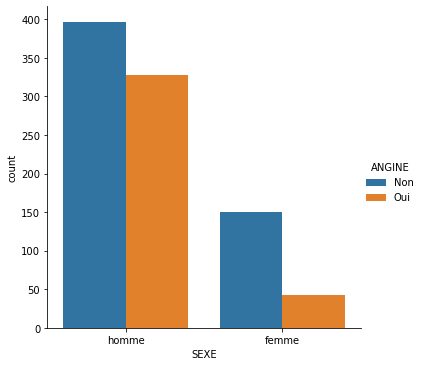

<Figure size 432x288 with 0 Axes>

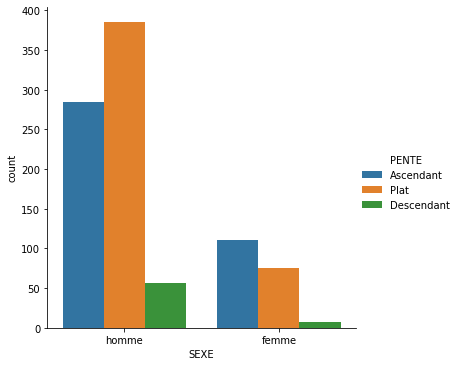

<Figure size 432x288 with 0 Axes>

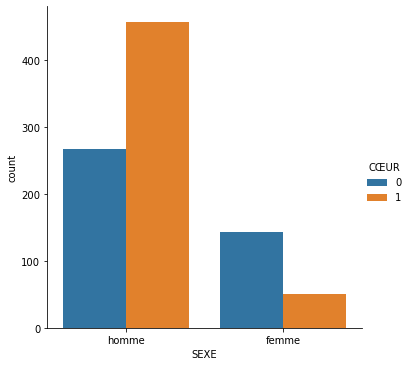

<Figure size 432x288 with 0 Axes>

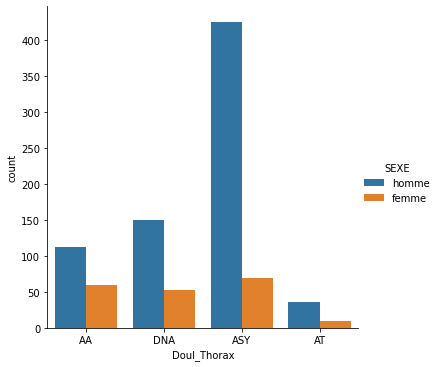

<Figure size 432x288 with 0 Axes>

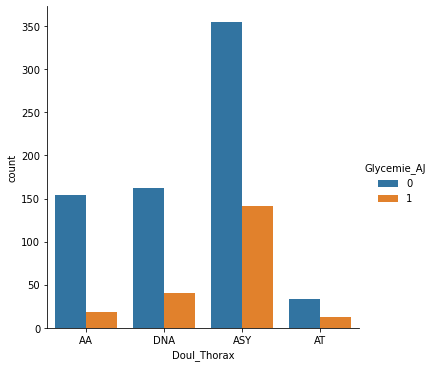

<Figure size 432x288 with 0 Axes>

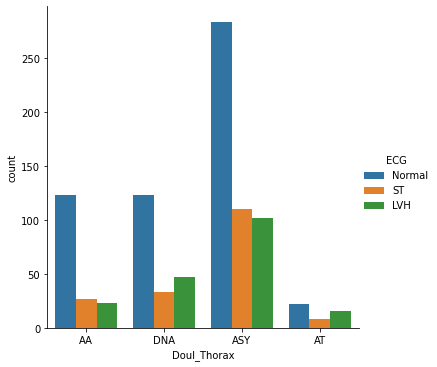

<Figure size 432x288 with 0 Axes>

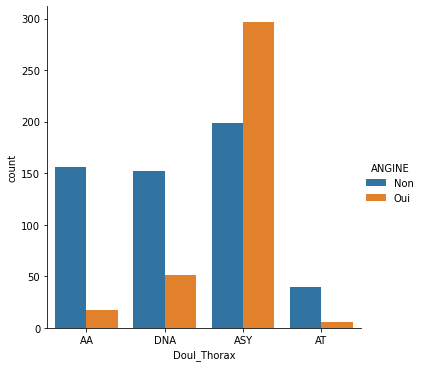

<Figure size 432x288 with 0 Axes>

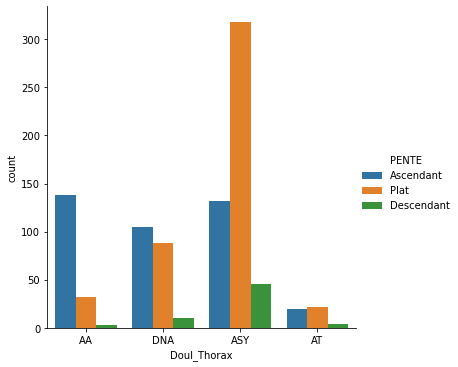

<Figure size 432x288 with 0 Axes>

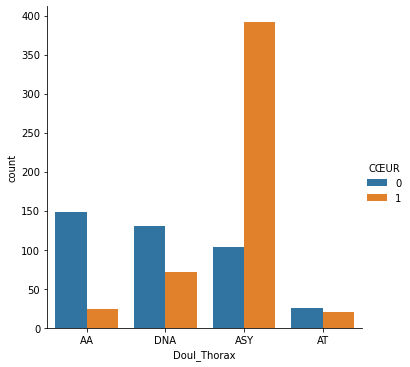

<Figure size 432x288 with 0 Axes>

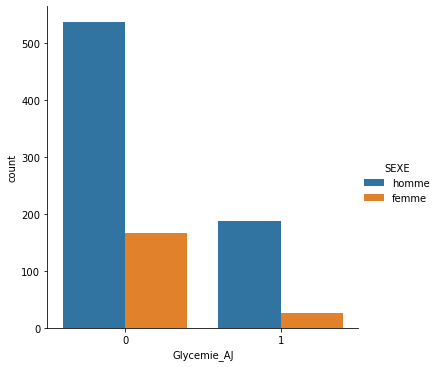

<Figure size 432x288 with 0 Axes>

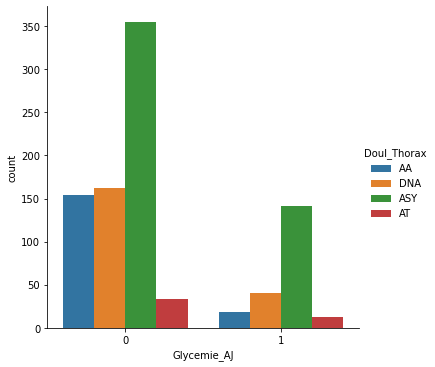

<Figure size 432x288 with 0 Axes>

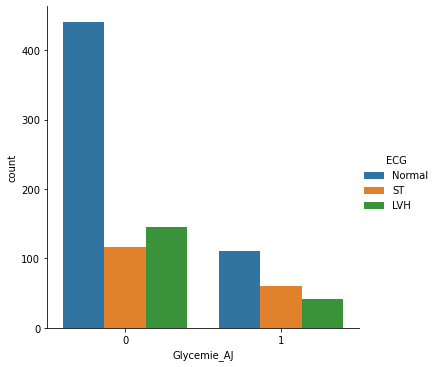

<Figure size 432x288 with 0 Axes>

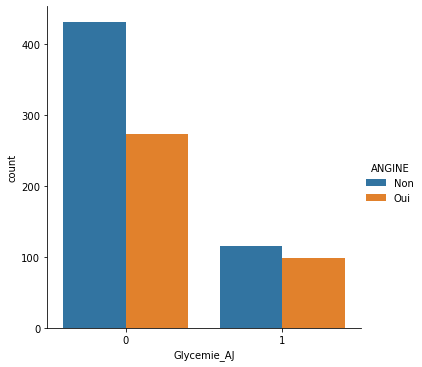

<Figure size 432x288 with 0 Axes>

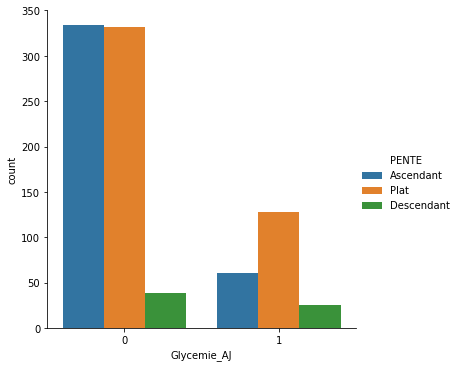

<Figure size 432x288 with 0 Axes>

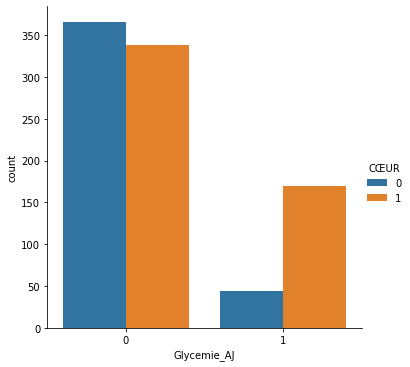

<Figure size 432x288 with 0 Axes>

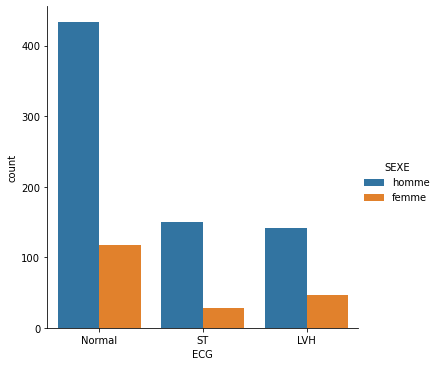

<Figure size 432x288 with 0 Axes>

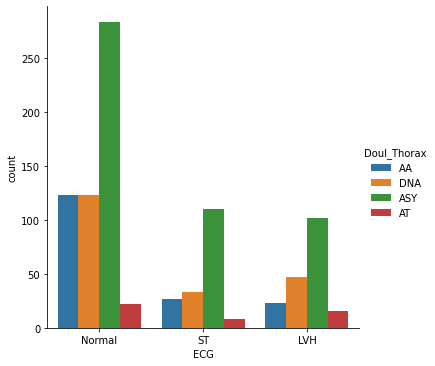

<Figure size 432x288 with 0 Axes>

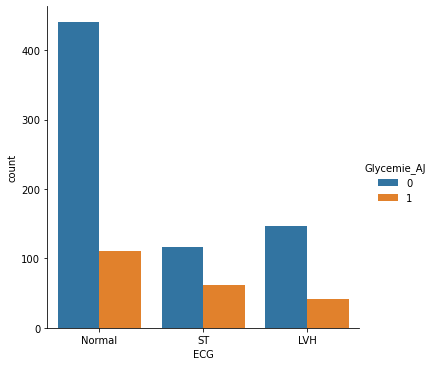

<Figure size 432x288 with 0 Axes>

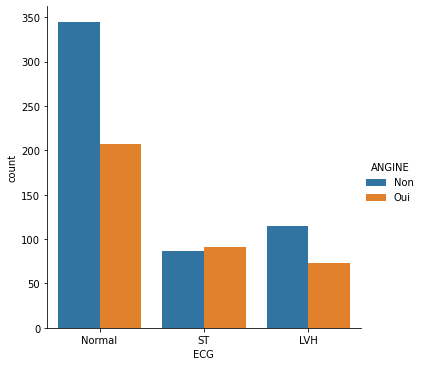

<Figure size 432x288 with 0 Axes>

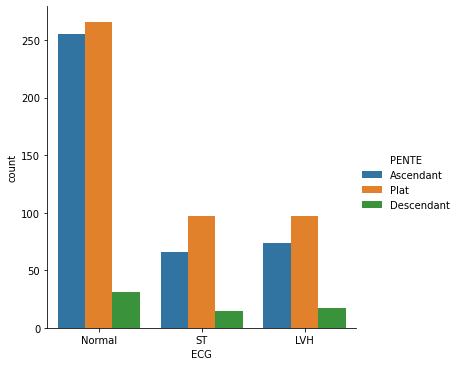

<Figure size 432x288 with 0 Axes>

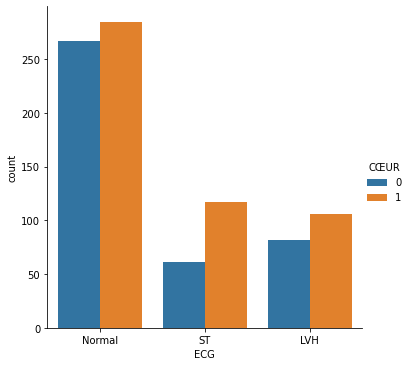

<Figure size 432x288 with 0 Axes>

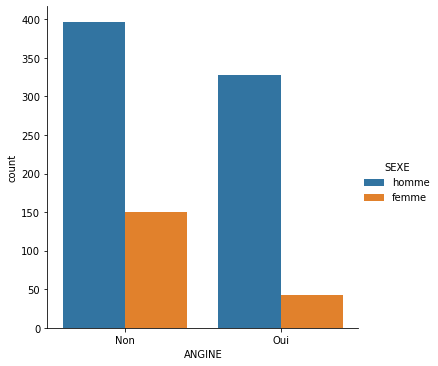

<Figure size 432x288 with 0 Axes>

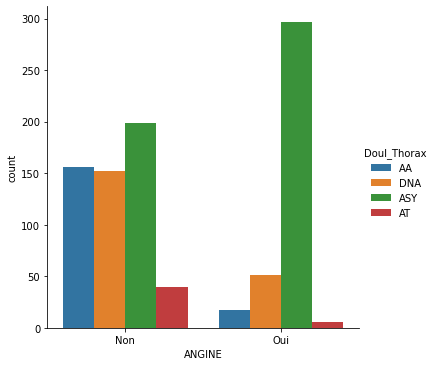

<Figure size 432x288 with 0 Axes>

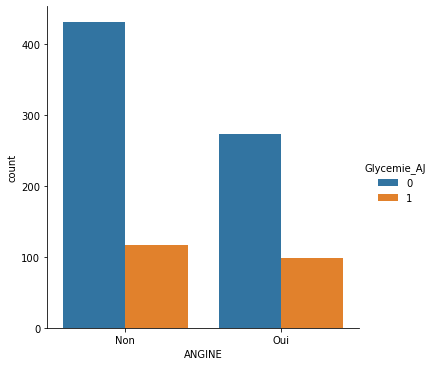

<Figure size 432x288 with 0 Axes>

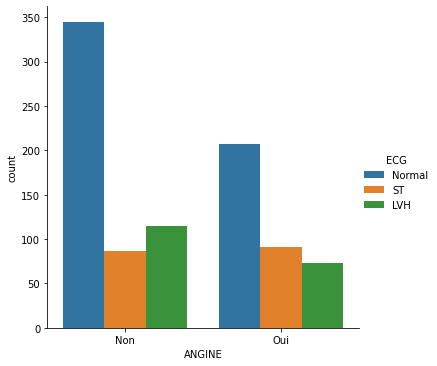

<Figure size 432x288 with 0 Axes>

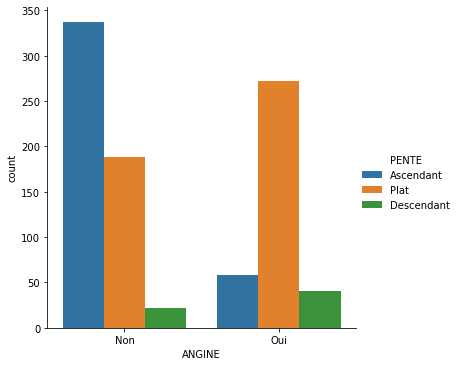

<Figure size 432x288 with 0 Axes>

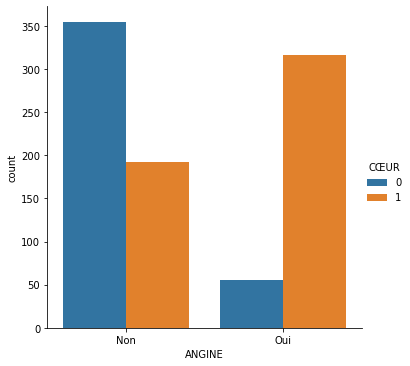

<Figure size 432x288 with 0 Axes>

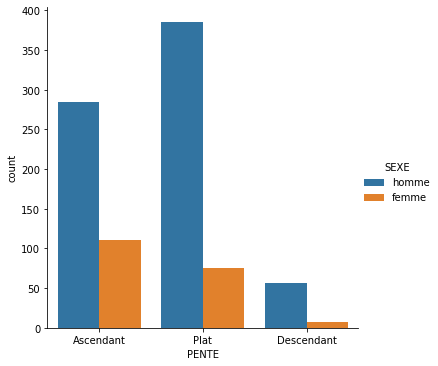

<Figure size 432x288 with 0 Axes>

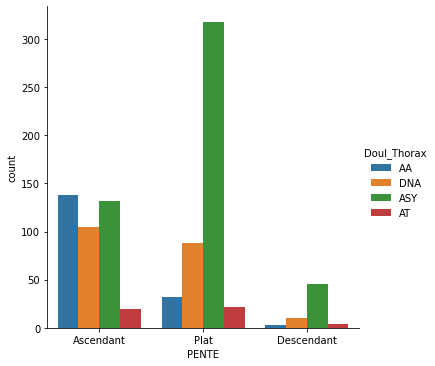

<Figure size 432x288 with 0 Axes>

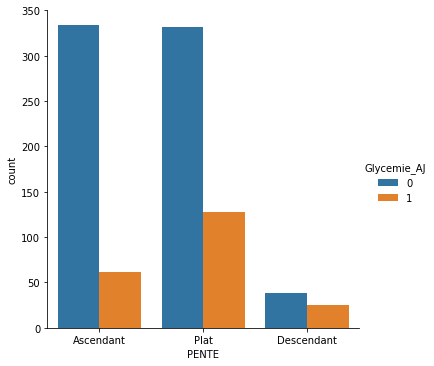

<Figure size 432x288 with 0 Axes>

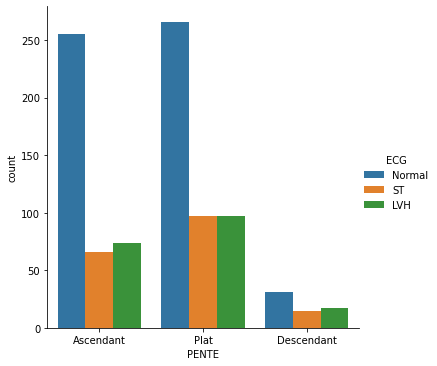

<Figure size 432x288 with 0 Axes>

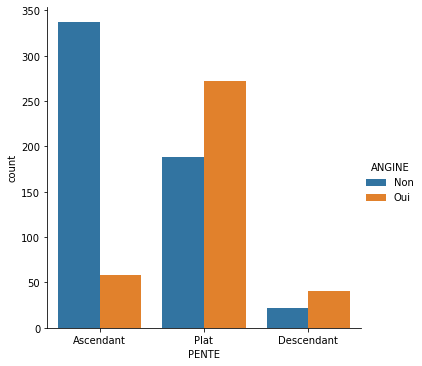

<Figure size 432x288 with 0 Axes>

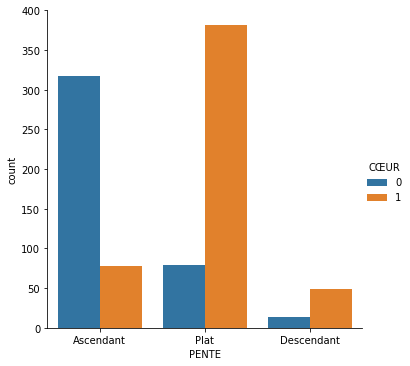

<Figure size 432x288 with 0 Axes>

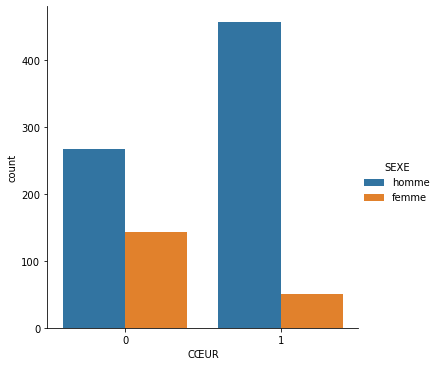

<Figure size 432x288 with 0 Axes>

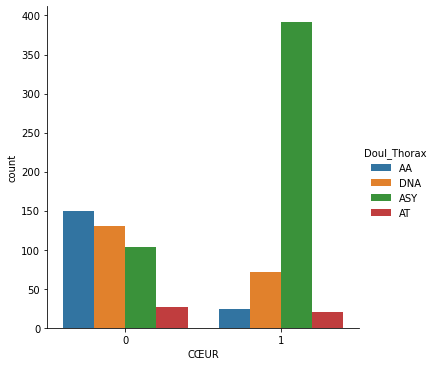

<Figure size 432x288 with 0 Axes>

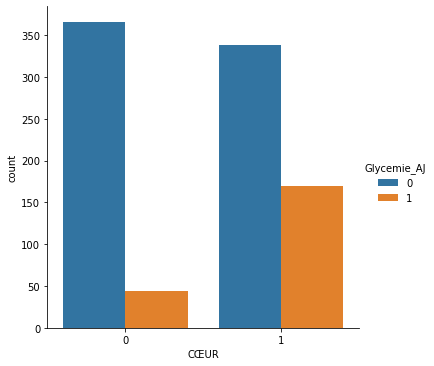

<Figure size 432x288 with 0 Axes>

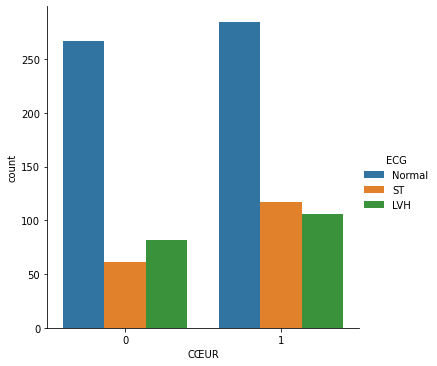

<Figure size 432x288 with 0 Axes>

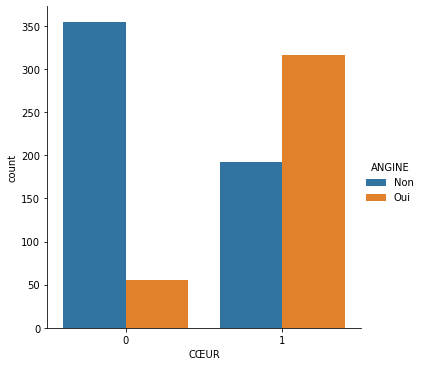

<Figure size 432x288 with 0 Axes>

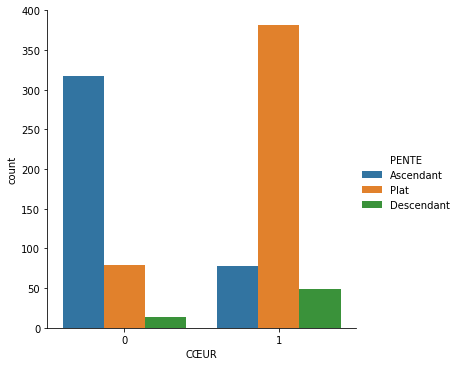

In [24]:
for col in kali_df:
    for row in kali_df:
        if col != row:            
            plt.figure()
            sns.factorplot(x = col, hue = row, data = df, kind = "count")
plt.show()

In [25]:
# On va evaluer la corrélation entre les variables

<AxesSubplot:>

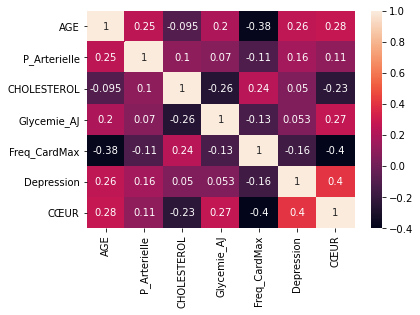

In [26]:
 sns.heatmap(df.corr(), annot=True)

### Les notes 

###### Importation du dataset.
Notre jeu de données regroupe 12 variables dont 5 qualitatives, 5 qualitatives et deux catégorielles avec la variable cible coeur.

###### Rénommage de certaines variables.
Pour m'approprier le jeu de données je renomme certaines variables

###### Voir la stats descriptives
Age                     28 --- 77
PAR                     00 --- 200  (Je me demande pourquoi cette valeur par de 00 ???)
Cholesterol             00 --- 603  (Je me demande pourquoi cette valeur par de 00 ???)
Fréquence cardiaque     60 --- 202
Dépression            -2,6 --- 6,2

SEXE les hommes sont les plus nombreux 725 / 918 ( il faut se demander pourquoi ??? )

##### Voir si les valeurs ne sont pas dupliquées, valeurs manquantes
Il n'y a pas de données dupliquées.
Ni de valeurs manquantes néanmoins je suis un peu dubitatifs sur les valeurs min nulles du PAR et du Cholestérol.

##### Visualisation
Observer toutes les variables.
Observer les variables qualitatives.